# CSCI 4587 Machine Learning
## Programming Assignment 1
### Robin Johnson

#### Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import table
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, recall_score, f1_score, precision_score, confusion_matrix

### Part 1 & Part 2

In [2]:
iris = pd.read_csv("iris.arff")
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class '], dtype='object')

In [4]:
iris['class '].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Preprocessing

In [5]:
iriscp = iris.copy()
replacement_list = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
iriscp.replace({'class ': replacement_list}, inplace=True)
iriscp

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iriscp_sh = shuffle(iriscp, random_state = 345)
iriscp_sh

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,0
134,6.1,2.6,5.6,1.4,2
78,6.0,2.9,4.5,1.5,1
27,5.2,3.5,1.5,0.2,0
10,5.4,3.7,1.5,0.2,0
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,1
42,4.4,3.2,1.3,0.2,0
137,6.4,3.1,5.5,1.8,2
83,6.0,2.7,5.1,1.6,1


In [7]:
X = iriscp_sh.iloc[:,0:4]
print("X")
print(X)
Y =iriscp_sh.iloc[:,4:5]
print("Y")
print(Y)

X
     sepal_length  sepal_width  petal_length  petal_width
34            4.9          3.1           1.5          0.1
134           6.1          2.6           5.6          1.4
78            6.0          2.9           4.5          1.5
27            5.2          3.5           1.5          0.2
10            5.4          3.7           1.5          0.2
..            ...          ...           ...          ...
75            6.6          3.0           4.4          1.4
42            4.4          3.2           1.3          0.2
137           6.4          3.1           5.5          1.8
83            6.0          2.7           5.1          1.6
24            4.8          3.4           1.9          0.2

[150 rows x 4 columns]
Y
     class 
34        0
134       2
78        1
27        0
10        0
..      ...
75        1
42        0
137       2
83        1
24        0

[150 rows x 1 columns]


In [8]:
y = Y.values.flatten()
y

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0], dtype=int64)

#### a)

In [9]:
etc = ExtraTreeClassifier()
etc_ypredict = cross_val_predict(etc, X, y, cv=10, n_jobs=10)
etc_ypredict

array([0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

#### Metrics

In [10]:
etc_accuracy = accuracy_score(y, etc_ypredict)
etc_bal_accuracy = balanced_accuracy_score(y, etc_ypredict)
etc_mcc = matthews_corrcoef(y, etc_ypredict)
etc_recall = recall_score(y, etc_ypredict, average='weighted')
etc_precision = precision_score(y, etc_ypredict, average='weighted')
etc_f1 = f1_score(y, etc_ypredict, average='weighted')
etc_conf_matrix = confusion_matrix(y, etc_ypredict)
etc_specificity = 2 * etc_bal_accuracy - etc_recall

In [11]:
print(f"Accuracy: {etc_accuracy}")
print(f"Balanced Accuracy: {etc_bal_accuracy}")
print(f"Matthews Corrcoef: {etc_mcc}")
print(f"Recall: {etc_recall}")
print(f"Precision: {etc_precision}")
print(f"F1: {etc_f1}")
print(f"Confucion Matrix:\n {etc_conf_matrix}")
print(f"Specificity: {etc_specificity}")

Accuracy: 0.9333333333333333
Balanced Accuracy: 0.9333333333333332
Matthews Corrcoef: 0.9002400960426865
Recall: 0.9333333333333333
Precision: 0.9340384615384615
F1: 0.9334427104175003
Confucion Matrix:
 [[49  1  0]
 [ 1 46  3]
 [ 0  5 45]]
Specificity: 0.9333333333333331


#### b)

In [12]:
bag = BaggingClassifier()
bag_ypredict = cross_val_predict(bag, X, y, cv=10, n_jobs=10)
bag_ypredict

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

#### Metrics

In [13]:
bag_accuracy = accuracy_score(y, bag_ypredict)
bag_bal_accuracy = balanced_accuracy_score(y, bag_ypredict)
bag_mcc = matthews_corrcoef(y, bag_ypredict)
bag_recall = recall_score(y, bag_ypredict, average='weighted')
bag_precision = precision_score(y, bag_ypredict, average='weighted')
bag_f1 = f1_score(y, bag_ypredict, average='weighted')
bag_conf_matrix = confusion_matrix(y, bag_ypredict)
bag_specificity = 2 * bag_bal_accuracy - bag_recall

In [14]:
print(f"Accuracy: {bag_accuracy}")
print(f"Balanced Accuracy: {bag_bal_accuracy}")
print(f"Matthews Corrcoef: {bag_mcc}")
print(f"Recall: {bag_recall}")
print(f"Precision: {bag_precision}")
print(f"F1: {bag_f1}")
print(f"Confucion Matrix:\n {bag_conf_matrix}")
print(f"Specificity: {bag_specificity}")

Accuracy: 0.96
Balanced Accuracy: 0.96
Matthews Corrcoef: 0.94
Recall: 0.96
Precision: 0.96
F1: 0.96
Confucion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Specificity: 0.96


#### c)

In [15]:
dtc = DecisionTreeClassifier()
dtc_ypredict = cross_val_predict(dtc, X, y, cv=10, n_jobs=10)
dtc_ypredict

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

#### Metrics

In [16]:
dtc_accuracy = accuracy_score(y, dtc_ypredict)
dtc_bal_accuracy = balanced_accuracy_score(y, dtc_ypredict)
dtc_mcc = matthews_corrcoef(y, dtc_ypredict)
dtc_recall = recall_score(y, dtc_ypredict, average='weighted')
dtc_precision = precision_score(y, dtc_ypredict, average='weighted')
dtc_f1 = f1_score(y, dtc_ypredict, average='weighted')
dtc_conf_matrix = confusion_matrix(y, dtc_ypredict)
dtc_specificity = 2 * dtc_bal_accuracy - dtc_recall

In [17]:
print(f"Accuracy: {dtc_accuracy}")
print(f"Balanced Accuracy: {dtc_bal_accuracy}")
print(f"Matthews Corrcoef: {dtc_mcc}")
print(f"Recall: {dtc_recall}")
print(f"Precision: {dtc_precision}")
print(f"F1: {dtc_f1}")
print(f"Confucion Matrix:\n {dtc_conf_matrix}")
print(f"Specificity: {dtc_specificity}")

Accuracy: 0.96
Balanced Accuracy: 0.96
Matthews Corrcoef: 0.9402507669779171
Recall: 0.96
Precision: 0.9604700854700855
F1: 0.9599839935974389
Confucion Matrix:
 [[50  0  0]
 [ 0 46  4]
 [ 0  2 48]]
Specificity: 0.96


#### d)

In [18]:
lr = LogisticRegression(solver='liblinear')
lr_ypredict = cross_val_predict(lr, X, y, cv=10, n_jobs=10)
lr_ypredict

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2,
       0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

#### Metrics

In [19]:
lr_accuracy = accuracy_score(y, lr_ypredict)
lr_bal_accuracy = balanced_accuracy_score(y, lr_ypredict)
lr_mcc = matthews_corrcoef(y, lr_ypredict)
lr_recall = recall_score(y, lr_ypredict, average='weighted')
lr_precision = precision_score(y, lr_ypredict, average='weighted')
lr_f1 = f1_score(y, lr_ypredict, average='weighted')
lr_conf_matrix = confusion_matrix(y, lr_ypredict)
lr_specificity = 2 * lr_bal_accuracy - lr_recall

In [20]:
print(f"Accuracy: {lr_accuracy}")
print(f"Balanced Accuracy: {lr_bal_accuracy}")
print(f"Matthews Corrcoef: {lr_mcc}")
print(f"Recall: {lr_recall}")
print(f"Precision: {lr_precision}")
print(f"F1: {lr_f1}")
print(f"Confucion Matrix:\n {lr_conf_matrix}")
print(f"Specificity: {lr_specificity}")

Accuracy: 0.96
Balanced Accuracy: 0.96
Matthews Corrcoef: 0.941004273790697
Recall: 0.96
Precision: 0.9618894256575417
F1: 0.9599358974358975
Confucion Matrix:
 [[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]
Specificity: 0.96


#### e)

In [21]:
svc = SVC()
svc_ypredict = cross_val_predict(svc, X, y, cv=10, n_jobs=10)
svc_ypredict

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

#### Metrics

In [22]:
svc_accuracy = accuracy_score(y, svc_ypredict)
svc_bal_accuracy = balanced_accuracy_score(y, svc_ypredict)
svc_mcc = matthews_corrcoef(y, svc_ypredict)
svc_recall = recall_score(y, svc_ypredict, average='weighted')
svc_precision = precision_score(y, svc_ypredict, average='weighted')
svc_f1 = f1_score(y, svc_ypredict, average='weighted')
svc_conf_matrix = confusion_matrix(y, svc_ypredict)
svc_specificity = 2 * svc_bal_accuracy - svc_recall

In [23]:
print(f"Accuracy: {svc_accuracy}")
print(f"Balanced Accuracy: {svc_bal_accuracy}")
print(f"Matthews Corrcoef: {svc_mcc}")
print(f"Recall: {svc_recall}")
print(f"Precision: {svc_precision}")
print(f"F1: {svc_f1}")
print(f"Confucion Matrix:\n {svc_conf_matrix}")
print(f"Specificity: {svc_specificity}")

Accuracy: 0.96
Balanced Accuracy: 0.96
Matthews Corrcoef: 0.9402507669779171
Recall: 0.96
Precision: 0.9604700854700855
F1: 0.9599839935974391
Confucion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Specificity: 0.96


#### f)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_ypredict = cross_val_predict(knn, X, y, cv=10, n_jobs=10)
knn_ypredict

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

#### Metrics

In [25]:
knn_accuracy = accuracy_score(y, knn_ypredict)
knn_bal_accuracy = balanced_accuracy_score(y, knn_ypredict)
knn_mcc = matthews_corrcoef(y, knn_ypredict)
knn_recall = recall_score(y, knn_ypredict, average='weighted')
knn_precision = precision_score(y, knn_ypredict, average='weighted')
knn_f1 = f1_score(y, knn_ypredict, average='weighted')
knn_conf_matrix = confusion_matrix(y, knn_ypredict)
knn_specificity = 2 * knn_bal_accuracy - knn_recall

In [26]:
print(f"Accuracy: {knn_accuracy}")
print(f"Balanced Accuracy: {knn_bal_accuracy}")
print(f"Matthews Corrcoef: {knn_mcc}")
print(f"Recall: {knn_recall}")
print(f"Precision: {knn_precision}")
print(f"F1: {knn_f1}")
print(f"Confucion Matrix:\n {knn_conf_matrix}")
print(f"Specificity: {knn_specificity}")

Accuracy: 0.96
Balanced Accuracy: 0.96
Matthews Corrcoef: 0.9402507669779171
Recall: 0.96
Precision: 0.9604700854700855
F1: 0.9599839935974389
Confucion Matrix:
 [[50  0  0]
 [ 0 46  4]
 [ 0  2 48]]
Specificity: 0.96


#### Graph comparing based on balanced accuracy

In [27]:
models = ['KNeighbors', 'SVC', 'DecisionTree', 'Bagging', 'ExtraTree', 'LogisticRegression']
balanced_accuracies = [knn_bal_accuracy, svc_bal_accuracy, dtc_bal_accuracy, bag_bal_accuracy, etc_bal_accuracy, lr_bal_accuracy]

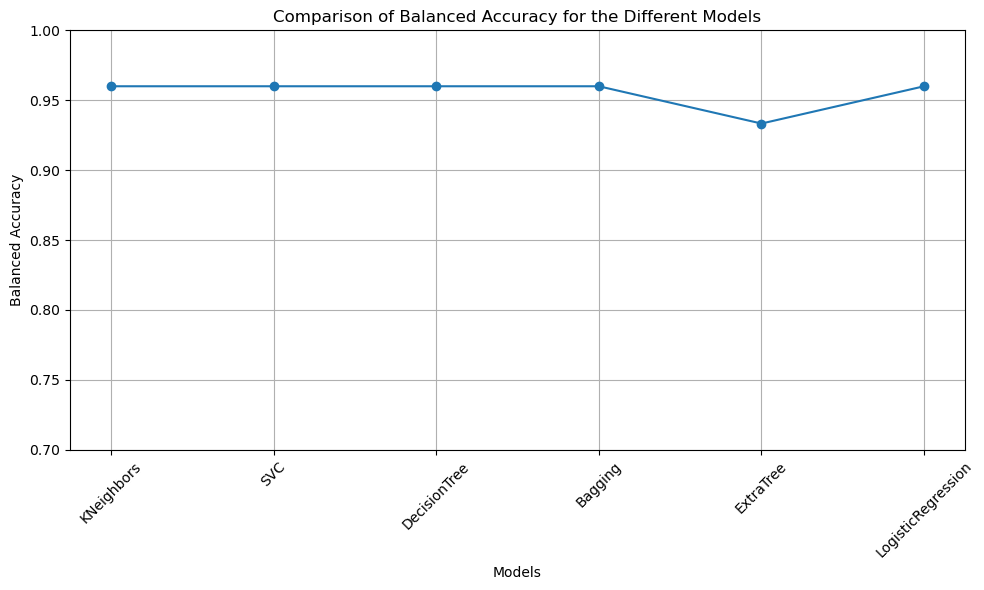

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(models, balanced_accuracies, marker='o', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Balanced Accuracy')
plt.title('Comparison of Balanced Accuracy for the Different Models')
plt.ylim(0.7, 1.0)  # Set the y-axis limit to ensure the same scale
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

#### Table containing metrics of all models above

In [29]:
data = {
    'Model': ['KNeighbors', 'SVC', 'DecisionTree', 'Bagging', 'ExtraTree', 'LogisticRegression'],
    'Accuracy': [knn_accuracy, svc_accuracy, dtc_accuracy, bag_accuracy, etc_accuracy, lr_accuracy],
    'Balanced Accuracy': [knn_bal_accuracy, svc_bal_accuracy, dtc_bal_accuracy, bag_bal_accuracy, etc_bal_accuracy, lr_bal_accuracy],
    'Matthews Corrcoef': [knn_mcc, svc_mcc, dtc_mcc, bag_mcc, etc_mcc, lr_mcc],
    'Recall': [knn_recall, svc_recall, dtc_recall, bag_recall, etc_recall, lr_recall],
    'Precision': [knn_precision, svc_precision, dtc_precision, bag_precision, etc_precision, lr_precision],
    'F1': [knn_f1, svc_f1, dtc_f1, bag_f1, etc_f1, lr_f1],
    'Specificity': [knn_specificity, svc_specificity, dtc_specificity, bag_specificity, etc_specificity, lr_specificity],
    'Confusion Matrix': [knn_conf_matrix, svc_conf_matrix, dtc_conf_matrix, bag_conf_matrix, etc_conf_matrix, lr_conf_matrix]
}

model_metric_table = pd.DataFrame(data)
model_metric_table.to_csv('model_metrics.csv', index=False)
model_metric_table


,Model,Accuracy,Balanced Accuracy,Matthews Corrcoef,Recall,Precision,F1,Specificity,Confusion Matrix
0,KNeighbors,0.960000,0.960000,0.940251,0.960000,0.960470,0.959984,0.960000,"[[50, 0, 0], [0, 46, 4], [0, 2, 48]]"
1,SVC,0.960000,0.960000,0.940251,0.960000,0.960470,0.959984,0.960000,"[[50, 0, 0], [0, 48, 2], [0, 4, 46]]"
2,DecisionTree,0.960000,0.960000,0.940251,0.960000,0.960470,0.959984,0.960000,"[[50, 0, 0], [0, 46, 4], [0, 2, 48]]"
3,Bagging,0.960000,0.960000,0.940000,0.960000,0.960000,0.960000,0.960000,"[[50, 0, 0], [0, 47, 3], [0, 3, 47]]"
4,ExtraTree,0.933333,0.933333,0.900240,0.933333,0.934038,0.933443,0.933333,"[[49, 1, 0], [1, 46, 3], [0, 5, 45]]"
5,LogisticRegression,0.960000,0.960000,0.941004,0.960000,0.961889,0.959936,0.960000,"[[50, 0, 0], [0, 45, 5], [0, 1, 49]]"


C:\Users\green\Anadconda\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


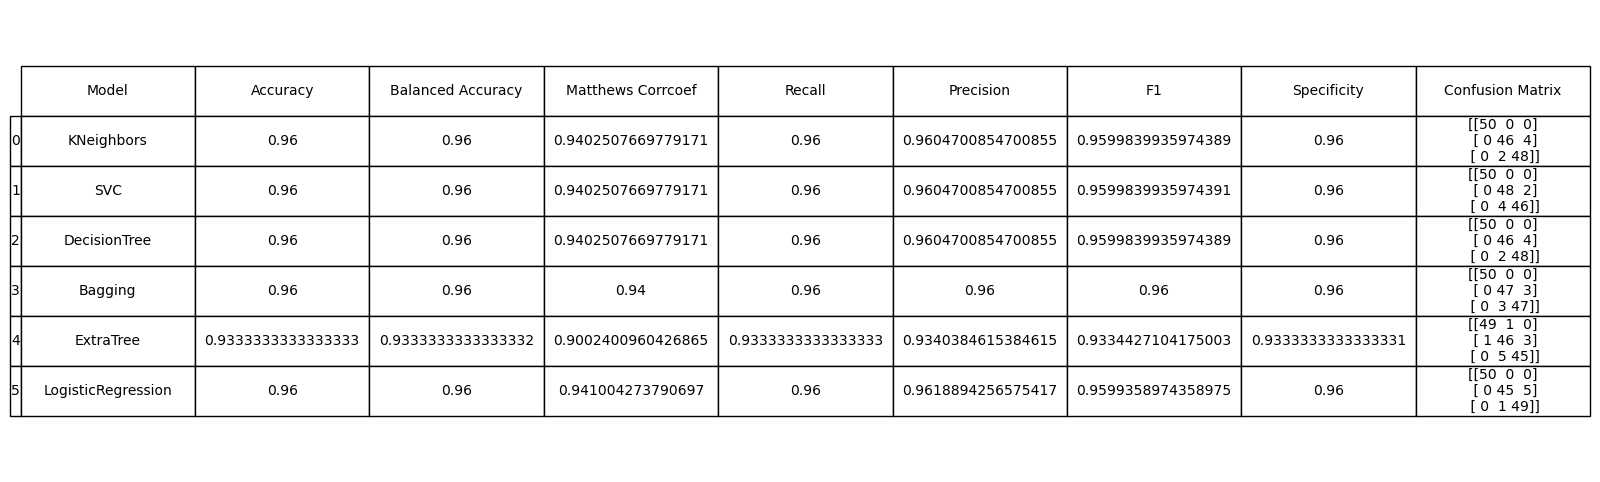

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
tbl = table(ax, model_metric_table, loc='center', cellLoc='center', colWidths=[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15])
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 3.0)  # Adjust the scaling factor as needed

plt.savefig('pt1&2_table_image.png', bbox_inches='tight', pad_inches=0.1, dpi=300)


### Part 3

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ensemble Classifier 1

In [32]:
ensemble1_base_1 = RandomForestClassifier()
ensemble1_base_2 = GradientBoostingClassifier()
ensemble1_base_3 = AdaBoostClassifier()

In [33]:
ensemble1_base_1.fit(X_train,y_train)
ensemble1_base_2.fit(X_train,y_train)
ensemble1_base_3.fit(X_train,y_train)

AdaBoostClassifier()

In [34]:
ensemble1_probab1 = ensemble1_base_1.predict_proba(X_test)
ensemble1_probab2 = ensemble1_base_2.predict_proba(X_test)
ensemble1_probab3 = ensemble1_base_3.predict_proba(X_test)

In [35]:
ensemble1_meta_stack = np.column_stack((ensemble1_probab1, ensemble1_probab2, ensemble1_probab3))

In [36]:
ensemble1_meta = LogisticRegression()
ensemble1_meta.fit(ensemble1_meta_stack, y_test)
ensemble1_predictions = ensemble1_meta.predict(ensemble1_meta_stack)
ensemble1_predictions

array([0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 1, 0], dtype=int64)

#### Metrics

In [37]:
ensemble1_accuracy = accuracy_score(y_test, ensemble1_predictions)
ensemble1_bal_accuracy = balanced_accuracy_score(y_test, ensemble1_predictions)
ensemble1_mcc = matthews_corrcoef(y_test, ensemble1_predictions)
ensemble1_recall = recall_score(y_test, ensemble1_predictions, average='weighted')
ensemble1_precision = precision_score(y_test, ensemble1_predictions, average='weighted')
ensemble1_f1 = f1_score(y_test, ensemble1_predictions, average='weighted')
ensemble1_conf_matrix = confusion_matrix(y_test, ensemble1_predictions)
ensemble1_specificity = 2 * ensemble1_accuracy - ensemble1_recall

In [38]:
print(f"Accuracy: {ensemble1_accuracy}")
print(f"Balanced Accuracy: {ensemble1_bal_accuracy}")
print(f"Matthews Corrcoef: {ensemble1_mcc}")
print(f"Recall: {ensemble1_recall}")
print(f"Precision: {ensemble1_precision}")
print(f"F1: {ensemble1_f1}")
print(f"Confucion Matrix:\n {ensemble1_conf_matrix}")
print(f"Specificity: {ensemble1_specificity}")

Accuracy: 0.9666666666666667
Balanced Accuracy: 0.9696969696969697
Matthews Corrcoef: 0.9503480387433456
Recall: 0.9666666666666667
Precision: 0.9692307692307692
F1: 0.9665396825396826
Confucion Matrix:
 [[ 7  0  0]
 [ 0 12  0]
 [ 0  1 10]]
Specificity: 0.9666666666666667


Ensemble Classifier 2

In [39]:
ensemble2_base_1 = BaggingClassifier()
ensemble2_base_2 = ExtraTreeClassifier()
ensemble2_base_3 = RandomForestClassifier()

In [40]:
ensemble2_base_1.fit(X_train,y_train)
ensemble2_base_2.fit(X_train,y_train)
ensemble2_base_3.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
ensemble2_probab1 = ensemble1_base_1.predict_proba(X_test)
ensemble2_probab2 = ensemble1_base_2.predict_proba(X_test)
ensemble2_probab3 = ensemble1_base_3.predict_proba(X_test)

In [42]:
ensemble2_meta_stack = np.column_stack((ensemble2_probab1, ensemble2_probab2, ensemble2_probab3))

In [43]:
ensemble2_meta = GradientBoostingClassifier()
ensemble2_meta.fit(ensemble2_meta_stack, y_test)
ensemble2_predictions = ensemble2_meta.predict(ensemble2_meta_stack)
ensemble2_predictions

array([0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 1, 0], dtype=int64)

In [44]:
ensemble2_accuracy = accuracy_score(y_test, ensemble2_predictions)
ensemble2_bal_accuracy = balanced_accuracy_score(y_test, ensemble2_predictions)
ensemble2_mcc = matthews_corrcoef(y_test, ensemble2_predictions)
ensemble2_recall = recall_score(y_test, ensemble2_predictions, average='weighted')
ensemble2_precision = precision_score(y_test, ensemble2_predictions, average='weighted')
ensemble2_f1 = f1_score(y_test, ensemble2_predictions, average='weighted')
ensemble2_conf_matrix = confusion_matrix(y_test, ensemble2_predictions)
ensemble2_specificity = 2 * ensemble2_accuracy - ensemble2_recall

In [45]:
print(f"Accuracy: {ensemble2_accuracy}")
print(f"Balanced Accuracy: {ensemble2_bal_accuracy}")
print(f"Matthews Corrcoef: {ensemble2_mcc}")
print(f"Recall: {ensemble2_recall}")
print(f"Precision: {ensemble2_precision}")
print(f"F1: {ensemble2_f1}")
print(f"Confucion Matrix:\n {ensemble2_conf_matrix}")
print(f"Specificity: {ensemble2_specificity}")

Accuracy: 1.0
Balanced Accuracy: 1.0
Matthews Corrcoef: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0
Confucion Matrix:
 [[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]
Specificity: 1.0


#### Graph comparing based on balanced accuracy

In [46]:
models = ['Ensemble_1', 'Ensemble_2']
balanced_accuracies = [ensemble1_bal_accuracy, ensemble2_bal_accuracy]

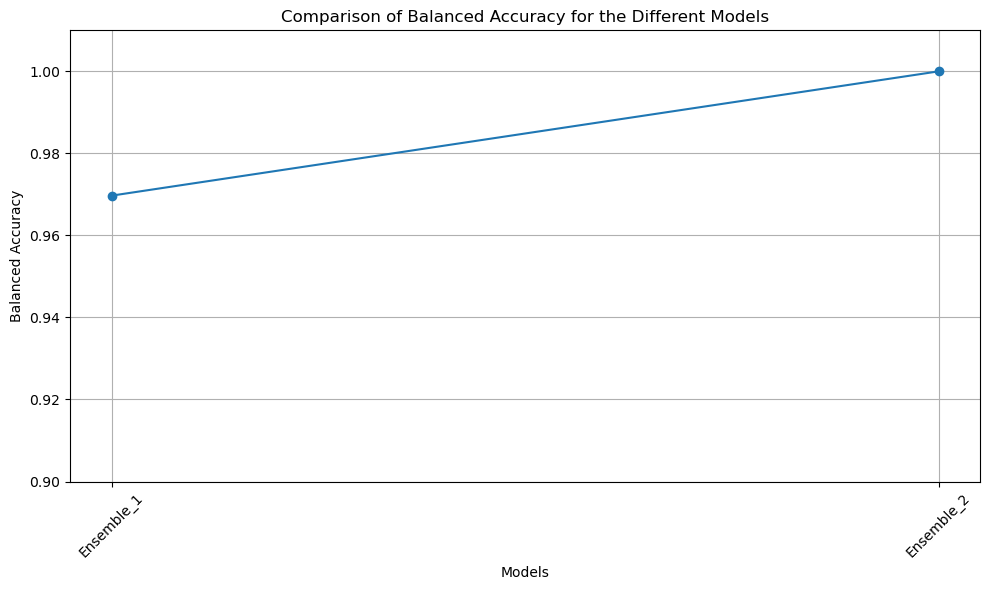

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(models, balanced_accuracies, marker='o', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Balanced Accuracy')
plt.title('Comparison of Balanced Accuracy for the Different Models')
plt.ylim(0.9, 1.01)  # Set the y-axis limit to ensure the same scale
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

#### Table containing metrics of the two ensembled models above

In [48]:
ensemble_data = {
    'Model': ['Ensemble_1', 'Ensemble_2'],
    'Accuracy': [ensemble1_accuracy, ensemble2_accuracy],
    'Balanced Accuracy': [ensemble1_bal_accuracy, ensemble2_bal_accuracy],
    'Matthews Corrcoef': [ensemble1_mcc, ensemble2_mcc],
    'Recall': [ensemble1_recall, ensemble2_recall],
    'Precision': [ensemble1_precision, ensemble2_precision],
    'F1': [ensemble1_f1, ensemble2_f1],
    'Specificity': [ensemble1_specificity, ensemble2_specificity],
    'Confusion Matrix': [ensemble1_conf_matrix, ensemble2_conf_matrix]
}

ensemble_metric_table = pd.DataFrame(ensemble_data)
ensemble_metric_table.to_csv('ensemble_metrics.csv', index=False)
ensemble_metric_table

,Model,Accuracy,Balanced Accuracy,Matthews Corrcoef,Recall,Precision,F1,Specificity,Confusion Matrix
0,Ensemble_1,0.966667,0.969697,0.950348,0.966667,0.969231,0.96654,0.966667,"[[7, 0, 0], [0, 12, 0], [0, 1, 10]]"
1,Ensemble_2,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,"[[7, 0, 0], [0, 12, 0], [0, 0, 11]]"


C:\Users\green\Anadconda\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


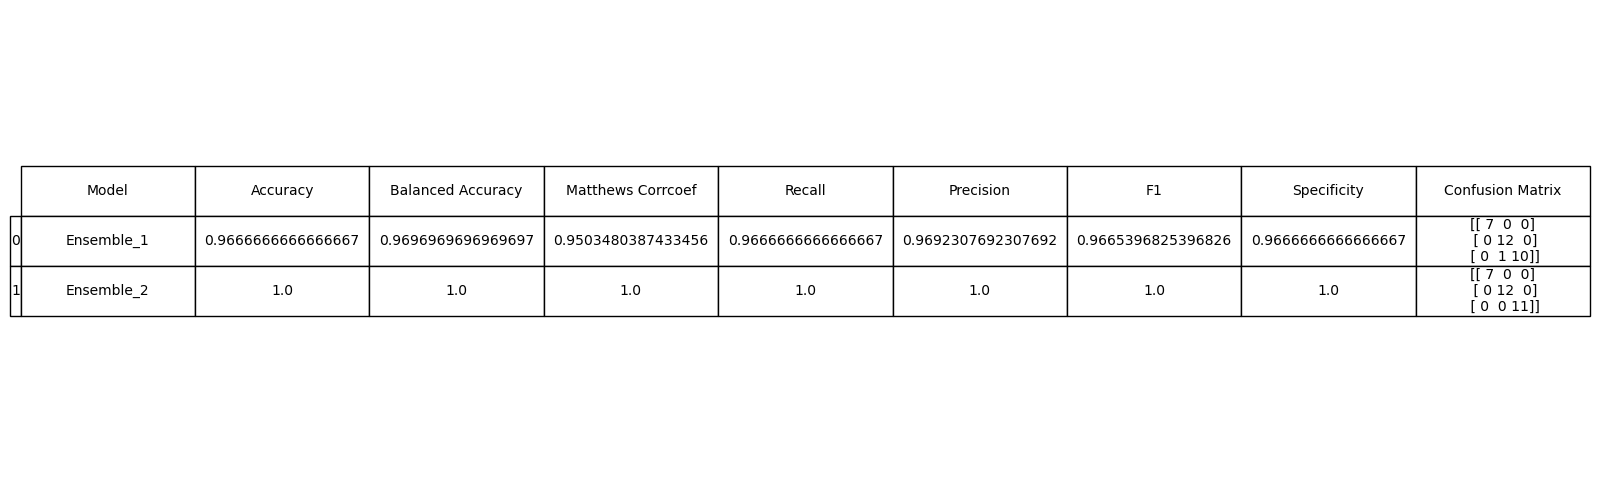

In [49]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.axis('off')
tbl2 = table(ax2, ensemble_metric_table, loc='center', cellLoc='center', colWidths=[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15])
tbl2.auto_set_font_size(False)
tbl2.set_fontsize(10)
tbl2.scale(1.5, 3.0)  # Adjust the scaling factor as needed

plt.savefig('pt3_table_image.png', bbox_inches='tight', pad_inches=0.1, dpi=300)